Q1. 
Ans: The search direction (2,5) is the gradient descent direction for the function (w1 - 10)**2 + (w2 - 10)**2. The gradient of the function is 2*(w1-10)+2*(w2-10) which aligns in the direction (2,5). 

Q2. Using steepest gradient descent, find all the local minima for the function  J(x1, x2) = (x1^2+x2−11)^2+(x1+x2^2−7)^2. While applying gradient descent, do the following (a) Fixing the value for alpha (b) use line search to determine the value for alpha. Plot the intermediate steps in the iteration to show one of the minimal point.

All local minima found:
[-3.77931025 -3.28318599]
[-2.80511808  3.13131252]
[ 3.58442834 -1.8481265 ]
[2.99999999 2.00000002]


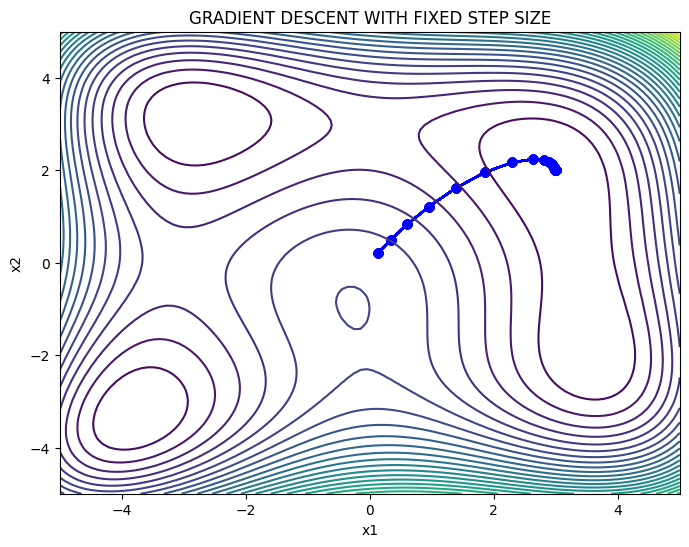

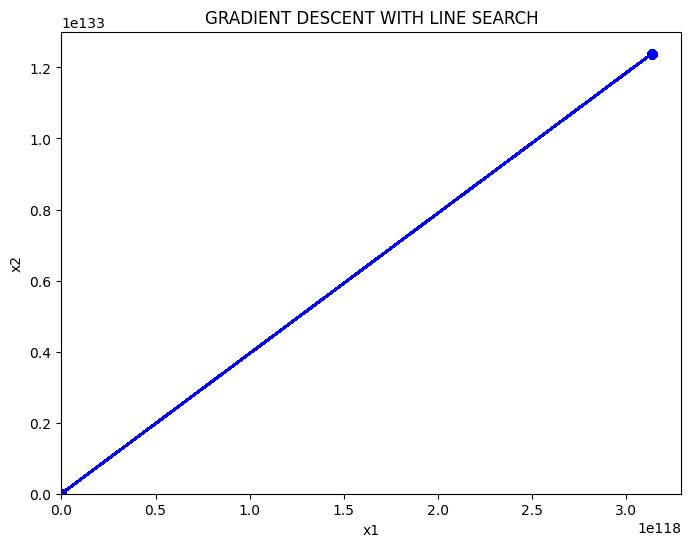

In [24]:
import numpy as np
import matplotlib.pyplot as plt

class ObjectiveFunction:
    def __init__(self):
        pass
    
    def evaluate(self, x):
        x1, x2 = x
        return (x1**2 + x2 - 11)**2 + (x1 + x2**2 - 7)**2
    
    def gradient(self, x):
        x1, x2 = x
        grad_x1 = 2 * (2 * x1 * (x1**2 + x2 - 11) + x1 + x2**2 - 7)
        grad_x2 = 2 * ((x1**2 + x2 - 11) + 2 * x2 * (x1 + x2**2 - 7))
        return np.array([grad_x1, grad_x2])

def gradient_descent_fixed_step(objective, initial_point, alpha, max_iter=1000, tol=1e-6):
    x = np.array(initial_point)
    minima = []
    for _ in range(max_iter):
        grad = objective.gradient(x)
        x = x - alpha * grad
        minima.append(x)
        if np.linalg.norm(grad) < tol:
            break
    return minima

def line_search(objective, initial_point, max_iter=1000, tol=1e-6):
    x = np.array(initial_point)
    minima = []
    for _ in range(max_iter):
        grad = objective.gradient(x)
        alpha = np.linalg.norm(grad)**2 / np.dot(grad, grad)
        x = x - alpha * grad
        minima.append(x)
        if np.linalg.norm(grad) < tol:
            break
    return minima

def plot_steps(history):
    history = np.array(history)
    plt.plot(history[:, 0], history[:, 1], '-o', color='blue')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Gradient Descent Steps')

if __name__ == "__main__":
    objective = ObjectiveFunction()
    initial_point = [0, 0]

    starting_points = [[i, j] for i in np.linspace(-5, 5, 10) for j in np.linspace(-5, 5, 10)]

    all_minima = []
    for point in starting_points:
        minima = gradient_descent(objective, point)
        all_minima.extend(minima)

    # Removing duplicate minima
    unique_minima = []
    for point in all_minima:
        is_unique = True
        for unique_point in unique_minima:
            if np.allclose(point, unique_point):
                is_unique = False
                break
        if is_unique:
            unique_minima.append(point)

    print("All local minima found:")
    for min_point in unique_minima:
        print(min_point)

    # Fixed step size
    alpha_fixed = 0.01
    minima_fixed = gradient_descent_fixed_step(objective, initial_point, alpha_fixed)
    plt.figure(figsize=(8, 6))
    for min_point in minima_fixed:
        plot_steps(minima_fixed)

    # Plotting the function contours using fixed alpha
    x1_range = np.linspace(-5, 5, 100)
    x2_range = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x1_range, x2_range)
    Z = objective.evaluate([X, Y])
    plt.contour(X, Y, Z, levels=30)
    plt.title("GRADIENT DESCENT WITH FIXED STEP SIZE")
    plt.show()

    # Line search
    minima_line_search = line_search(objective, initial_point)
    plt.figure(figsize=(8, 6))
    for min_point in minima_line_search:
        plot_steps(minima_line_search)

    # Plotting the contour of the function using Line Search
    plt.contour(X, Y, Z, levels=30)
    plt.title("GRADIENT DESCENT WITH LINE SEARCH")
    plt.show()
